In [70]:
# 17/05/2020
#  i_cuar2 = [13, 22, 56]
#  [294.75275119616697, array([4.62527321e-08, 3.70021857e-08, 7.69645463e-09, 1.00000000e-08]), 0.3333333333333333, 0.1, 20.0, 0.31622776601683794, 0.2]


In [71]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams_measures import *


In [72]:
df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
df = df.dropna(subset = ["Region"])

df = df.groupby("Fecha", as_index=False).sum()
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)
#df = df[df["Fecha_dt"] <= '2020-04-27']
i_data = df["Contagiados"].values

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
df = df.sort_values(by=["Fecha_dt"])
df = df.reset_index(drop=True)

In [74]:
df

,Fecha,Contagiados,Muertes,Recuperados,Infectados_Actuales,Total_Contagiados,Fecha_dt
0,3/2/2020,1,0,0,1,0.0,2020-03-02 00:00:00
1,3/3/2020,3,0,0,3,0.0,2020-03-03 00:00:00
2,3/4/2020,3,0,0,3,0.0,2020-03-04 00:00:00
3,3/5/2020,4,0,0,4,4.0,2020-03-05 00:00:00
4,3/6/2020,5,0,0,5,5.0,2020-03-06 00:00:00
5,3/7/2020,7,0,0,7,7.0,2020-03-07 00:00:00
6,3/8/2020,9,0,0,9,9.0,2020-03-08 00:00:00
7,3/9/2020,12,0,0,12,12.0,2020-03-09 00:00:00
8,3/10/2020,17,0,0,17,17.0,2020-03-10 00:00:00
9,3/11/2020,23,0,0,23,23.0,2020-03-11 00:00:00


In [75]:

i_cuar2 = [13, 22, 56]
print (i_cuar2)
print (df.Fecha.iloc[0])
print (df.Fecha.iloc[i_cuar2])
t_data = np.arange(len(df.Infectados_Actuales))
C_real = df.Contagiados.values
I_real = df.Infectados_Actuales.values
R_real = df.Recuperados.values + df.Muertes.values



[13, 22, 56]
3/2/2020
13    3/15/2020
22    3/24/2020
56    4/27/2020
Name: Fecha, dtype: object


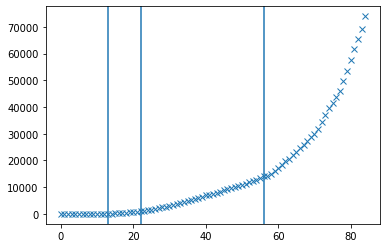

In [76]:
plt.plot(t_data, C_real, "x")
for i in i_cuar2:
    plt.axvline(i)

In [47]:
for i in range (len (i_cuar2)):
    plt.plot(t_data[:i_cuar+1], C_real [:i_cuar+1], marker = "x")
plt.plot(t_data[i_cuar:], C_real [i_cuar:], marker = "+")


NameError: name 'i_cuar' is not defined

In [48]:
#pop = 1.8e7
pop = 19458310

r0 =  0 
e0 =  0
i0 =  I_real[0]

s0 = pop - i0 - r0 - e0
c0 = C_real[0]


In [49]:
#[299.5594772806105, array([3.00e-08, 2.50e-08, 8.09e-09]), 1.0, 0.1, 60.0, 0.01, 0.5] 1.0 10.0
#[178.35889574679643, array([5.00e-08, 4.00e-08, 8.13e-09]), 0.25, 0.08333333333333333, 80.0, 0.001, 0.2] 4.0 12.0
#RMSE =  169.3488317760631 ; b, s, g =  [array([5.00e-08, 4.00e-08, 8.32e-09]), 0.25, 0.08333333333333333] ; a_d, k, a =  [20.0, 0.001, 0.2] ; ( 4.0 ,  12.0 )

trans_coeffs = []
#trans_coeffs.append(np.array([1e-8, 2e-8, 3e-8, 4e-8, 5e-8]))
#trans_coeffs.append(np.array([1e-8, 2e-8, 2.5e-8, 3e-8, 4e-8]))
#trans_coeffs.append(np.array([8.01e-9, 8.03e-9, 8.05e-9, 8.07e-9, 8.09e-9, 8.1e-9, 8.11e-9, 8.13e-9]))
trans_coeffs.append(np.array([4e-8, 5e-8, 6e-8, 7e-8]))
trans_coeffs.append(np.array([3e-8, 4e-8, 4.5e-8, 5e-8]))
trans_coeffs.append(np.array([8.29e-9, 8.3e-9, 8.32e-9, 8.34e-9, 8.36e-9, 8.38e-9, 8.4e-9]))

trans_coeffs = []
#trans_coeffs.append(np.array([1e-8, 2e-8, 3e-8, 4e-8, 5e-8]))
#trans_coeffs.append(np.array([1e-8, 2e-8, 2.5e-8, 3e-8, 4e-8]))
#trans_coeffs.append(np.array([8.01e-9, 8.03e-9, 8.05e-9, 8.07e-9, 8.09e-9, 8.1e-9, 8.11e-9, 8.13e-9]))
trans_coeffs.append(np.array([5e-8])*1.8e7/pop)
trans_coeffs.append(np.array([4e-8])*1.8e7/pop)
trans_coeffs.append(np.array([8.32e-9])*1.8e7/pop)
trans_coeffs.append(np.array([8e-9, 1e-8, 2e-8, 4e-8, 6e-8]))


print (trans_coeffs)
print (i_cuar2[:1])


[array([4.62527321e-08]), array([3.70021857e-08]), array([7.69645463e-09]), array([8.e-09, 1.e-08, 2.e-08, 4.e-08, 6.e-08])]
[13]


4.895477023965976e-07
0.6871168953272974 
0.05555556343557843 
56.08000441355646 
0.09999472332437251 
0.3856258452621279

In [50]:
min_ = GridSearchSEIR_exams_measures (t_data, s0, e0, i0, r0, c0, c0, C_real, 
                                      i_dates_betas = i_cuar2,
                                      transmission_coeffs = trans_coeffs, # 1 / day person                                                              
                                      latency_time = np.arange(1., 7., 1.), # days                                                                                                               
                                      infectious_time = np.arange(6., 18, 2.), # days                                                                                                            
                                      ks = 10**np.linspace(-3, 0, 7),
                                      a_dates = np.linspace (20, 100, 9),
                                      a_s = np.linspace(0.1, .9, 9), backward = True)


{'b0': array([4.62527321e-08]), 'b1': array([3.70021857e-08]), 'b2': array([7.69645463e-09]), 'b3': array([8.e-09, 1.e-08, 2.e-08, 4.e-08, 6.e-08])}
betas =  [4.62527321e-08 3.70021857e-08 7.69645463e-09 8.00000000e-09] 83.70455765724182
  min: RMSE =  565.3981940067939 ; b, s, g =  [array([4.62527321e-08, 3.70021857e-08, 7.69645463e-09, 8.00000000e-09]), 0.25, 0.08333333333333333] ; a_d, k, a =  [20.0, 0.0031622776601683794, 0.4] ; ( 4.0 ,  12.0 )
betas =  [4.62527321e-08 3.70021857e-08 7.69645463e-09 1.00000000e-08] 87.99721598625183
  min: RMSE =  294.75275119616697 ; b, s, g =  [array([4.62527321e-08, 3.70021857e-08, 7.69645463e-09, 1.00000000e-08]), 0.3333333333333333, 0.1] ; a_d, k, a =  [20.0, 0.31622776601683794, 0.2] ; ( 3.0 ,  10.0 )
betas =  [4.62527321e-08 3.70021857e-08 7.69645463e-09 2.00000000e-08] 89.53075194358826
  min: RMSE =  294.75275119616697 ; b, s, g =  [array([4.62527321e-08, 3.70021857e-08, 7.69645463e-09, 1.00000000e-08]), 0.3333333333333333, 0.1] ; a_d, k, a

In [51]:
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)
print (min_[3]/S_c_g[i_cuar2[-1]])
print (min_[3]/s0)

NameError: name 'i_dates_beta' is not defined

In [52]:
RMSE, betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = min_
print (min_, 1./sigma_g, 1/gamma_g)
i_cuar3 = i_cuar2[:1]
# [12.020757851191542, array([8.e-07, 1.e-07, 5.e-07]), 0.5, 0.16666666666666666, 40.0, 0.03162277660168379, 0.3]
#[8.486029477192394, array([7.e-07, 1.e-14]), 0.5, 0.125, 50.0, 0.1, 0.4] 2.0 8.0
#betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = np.array([7.e-07, 1.e-14, 7.e-07]), 0.5, 0.125, 50.0, 0.1, 0.4
#i_cuar3 = i_cuar2[:2]

[294.75275119616697, array([4.62527321e-08, 3.70021857e-08, 7.69645463e-09, 1.00000000e-08]), 0.3333333333333333, 0.1, 20.0, 0.31622776601683794, 0.2] 3.0 10.0


In [53]:
ts = np.arange (0, 100, 1)
i_ini = len(i_data) - len(I_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

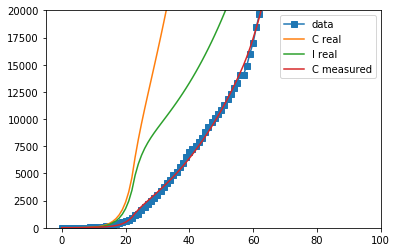

In [54]:
#betas_g = [3e-8]
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar2,
                                                            betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (t_data, C_real, label = "data", marker = "s")
plt.plot (ts, C_c_g, label = "C real")
plt.plot (ts, I_c_g, label = "I real")
plt.plot (ts, C_m_g, label = "C measured")

plt.xlim(-5, 100)
plt.ylim(-5, 20000)
plt.legend()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


19458309
2020-05-17 00:00:00


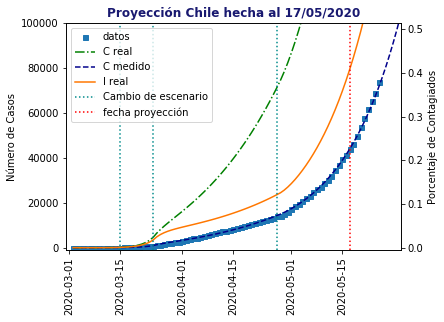

In [84]:
print (s0)
ts = np.arange (0, 100, 1)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar2, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.figure(figsize = (6, 5))
plt.subplots_adjust(bottom = 0.25)

plt.plot (x_plot_data, C_real, label = "datos", marker = "s", ls = "", markersize = 5)
plt.plot (x_plot_proy, C_c_g, label = "C real", c = "green", ls = "-.")
plt.plot (x_plot_proy, C_m_g, label = "C medido", c = "darkblue", ls = "--")
plt.plot (x_plot_proy, I_c_g, label = "I real", c = "#ff7700")
plt.axvline (x_plot_proy[i_cuar2[0]], ls = ":", label = "Cambio de escenario", c = "darkcyan")
for i in range (1, len(i_cuar2)):
    plt.axvline (x_plot_proy[i_cuar2[i]], ls = ":", c = "darkcyan")
print(x_plot_proy[76])
plt.axvline (x_plot_proy[76], ls = ":", c = "red", label = "fecha proyección")
plt.xlim (x_plot_proy[0] - pd.Timedelta(days=2), x_plot_proy[90])
plt.ylim (-1000, 100000)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Chile hecha al 17/05/2020", c = "midnightblue", weight = "bold")
plt.legend(loc = "upper left")

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

plt.savefig('Chile_1.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


19458309


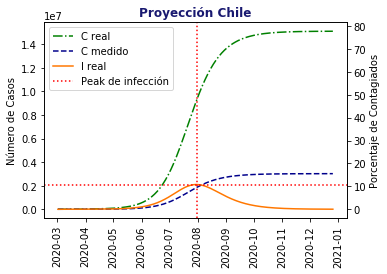

In [78]:
print (s0)
ts = np.arange (0, 300, 1)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])
 
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar2, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)
plt.subplots_adjust(left = 0.2, bottom = 0.2)
#plt.plot (x_plot_data, C_real, label = "datos", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "C real", c = "green", ls = "-.")
plt.plot (x_plot_proy, C_m_g, label = "C medido", c = "darkblue", ls = "--")
plt.plot (x_plot_proy, I_c_g, label = "I real", c = "#ff7700")
#plt.axvline (x_plot_proy[i_cuar2[0]], ls = ":", label = "Cambio de escenario", c = "darkcyan")
#for i in range (1, len(i_cuar2)):
#    plt.axvline (x_plot_proy[i_cuar2[i]], ls = ":", c = "darkcyan")
    
plt.axvline (x_plot_proy[I_c_g.argmax()], ls = ":", c = "red", label = "Peak de infección")
plt.axhline (I_c_g.max(), ls = ":", c = "red")
#plt.xlim (x_plot_proy[0], x_plot_proy[40])
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Chile", c = "midnightblue", weight = "bold")
plt.legend(loc = "upper left")

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

plt.savefig('Chile_2.eps', format='eps')

In [57]:
print (np.sqrt(((C_real-C_m_g[:len(C_real)])**2).mean()))

294.75275119616697


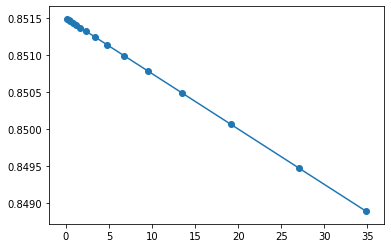

In [32]:
dC_c_g = C_c_g [1:16] - C_c_g[:15]
dC_m_g = C_m_g [1:16] - C_m_g[:15]
a__ = dC_m_g/dC_c_g
alphas = 1 + (a_g-1)/(1+np.exp(-k_g*(dC_c_g-a_date_g)))
plt.plot (dC_c_g, alphas)

plt.scatter (dC_c_g, a__)

In [33]:
print(betas_g)
betas_g2 =np.array([7.e-7, 1.e-14, 7.e-7])

[4.62527321e-08 3.70021857e-08 7.69645463e-09]


In [34]:
S_c_g2, E_c_g2, I_c_g2, R_c_g2, C_c_g2, C_m_g2 = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            [i_cuar, 30], betas_g2, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

NameError: name 'i_cuar' is not defined

NameError: name 'C_c_g2' is not defined

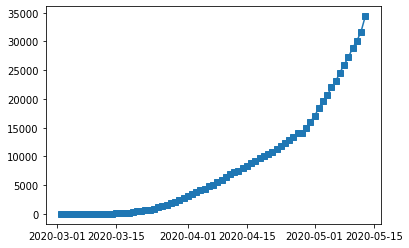

In [35]:
plt.plot (x_plot_data, C_real, label = "data", marker = "s")
plt.plot (x_plot_proy, C_c_g2, label = "C real")
plt.plot (x_plot_proy, C_m_g2, label = "C measured")
plt.plot (x_plot_proy, I_c_g2, label = "I real")
plt.plot ()
plt.xlim (x_plot_proy[0], x_plot_proy[50])
plt.ylim (-5, 1000)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend()